In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data=pd.read_csv("C:/Users/ADMIN/Downloads/churn_data.csv")

In [101]:
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,None
1,34,Yes,One year,No,Mailed check,56.95,1889.50,0,None
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,None
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,None
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,None


In [102]:
data.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [ ]:
data=data.drop(["customerID"],axis=1)

In [104]:
data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,None
1,34,Yes,One year,No,Mailed check,56.95,1889.50,0,None
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,None
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,None
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,None


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7032 non-null   int64  
 1   PhoneService      7032 non-null   object 
 2   Contract          7032 non-null   object 
 3   PaperlessBilling  7032 non-null   object 
 4   PaymentMethod     7032 non-null   object 
 5   MonthlyCharges    7032 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7032 non-null   int64  
 8   churn             0 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 549.4+ KB


In [106]:
data.isnull().sum()

tenure                 0
PhoneService           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
churn               7032
dtype: int64

In [72]:
data["TotalCharges"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [79]:
data.duplicated().any()

True

In [73]:
#converting TotalCharges into numerical data type
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')

In [83]:
data.isnull().sum()

tenure                 0
PhoneService           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
churn               7032
dtype: int64

In [78]:
data.dropna(inplace = True)

In [82]:
data["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [81]:
#labelling target as 0 and 1:
data["churn"]=data["Churn"].replace({"Yes":1,"No":0},inplace=True)
data["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [40]:
#lets convert all the categorical variables into dummy variables
data_dummies=pd.get_dummies(data)

In [84]:
data_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,1,0,0,0,1,0,0,1,0


In [85]:
data.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14888\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14888\220979415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True,linewidth=2,linecolor='lightgrey')


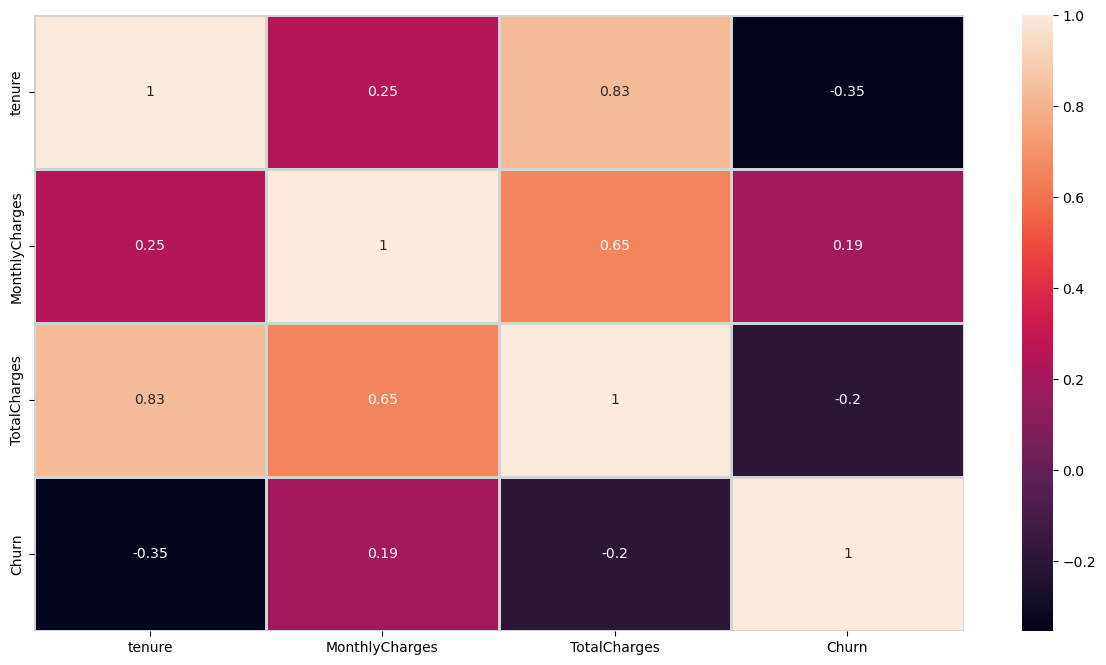

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(),annot=True,linewidth=2,linecolor='lightgrey')
plt.show()

# Model Selection:
before model selction we need to scale our data.


In [87]:
y = data_dummies['Churn'].values
X = data_dummies.drop(columns = ['Churn'])

In [117]:
X.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
PhoneService_No                            0
PhoneService_Yes                           0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaperlessBilling_No                        0
PaperlessBilling_Yes                       0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
dtype: int64

In [116]:
mean=X["TotalCharges"].mean()
X["TotalCharges"].replace(np.nan,mean,inplace=True)

In [100]:
data.isna().sum()
#data.drop(["churn"],axis=1)

tenure                 0
PhoneService           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
churn               7032
dtype: int64

In [118]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [119]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [120]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [121]:
pred=lgr.predict(X_test)

In [122]:
acc=accuracy_score(y_test,pred)

In [123]:
acc

0.7917652626597255